In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ghazaldanaei","key":"168f147cb8a72fb72cd538f305669a79"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 39.9MB/s]


In [5]:
!ls

kaggle.json  mobile-price-classification.zip  sample_data


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('mobile-price-classification.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()
import pandas as pd
train=pd.read_csv('/content/files/train.csv')
test=pd.read_csv('/content/files/test.csv')

**There is no null data in dataset.but screen width(sc_w) which is in milimeters can't be 0.**

In [7]:
train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

***filling records having 0 as screen width and internal memory with the mean of the the columns.***

In [8]:
train[train['sc_w']==0] = train['sc_w'].mean()
train[train['int_memory']==0] = train['int_memory'].mean()

In [9]:
pd.set_option('display.max_columns', None)
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,1.0,0.5,1.0,0.0,1.0,2.0,0.8,106.0,6.0,14.0,1222.0,1890.0,668.0,13.0,4.0,19.0,1.0,1.0,0.0,0.0
1996,1965.0,1.0,2.6,1.0,0.0,0.0,39.0,0.2,187.0,4.0,3.0,915.0,1965.0,2032.0,11.0,10.0,16.0,1.0,1.0,1.0,2.0
1997,1911.0,0.0,0.9,1.0,1.0,1.0,36.0,0.7,108.0,8.0,3.0,868.0,1632.0,3057.0,9.0,1.0,5.0,1.0,1.0,0.0,3.0
1998,1512.0,0.0,0.9,0.0,4.0,1.0,46.0,0.1,145.0,5.0,5.0,336.0,670.0,869.0,18.0,10.0,19.0,1.0,1.0,1.0,0.0


**Removing outliers which are more than mean+3*std or less than mean-3*std.**

In [10]:
from scipy import stats
import numpy as np
df = train[(np.abs(stats.zscore(train['battery_power']))< 3)]
df = df[(np.abs(stats.zscore(df[ 'clock_speed'])) < 3)]
df = df[(np.abs(stats.zscore(df[ 'fc']))          < 3)]
df = df[(np.abs(stats.zscore(df[ 'int_memory']))  < 3)]
df = df[(np.abs(stats.zscore(df[ 'm_dep']))       < 3)]
df = df[(np.abs(stats.zscore(df[ 'mobile_wt']))   < 3)]
df = df[(np.abs(stats.zscore(df[ 'n_cores']))     < 3)]
df = df[(np.abs(stats.zscore(df[ 'pc']))          < 3)]
df = df[(np.abs(stats.zscore(df[ 'px_height']))   < 3)]
df = df[(np.abs(stats.zscore(df[ 'px_width']))    < 3)]
df = df[(np.abs(stats.zscore(df[ 'ram']))         < 3)]
df = df[(np.abs(stats.zscore(df[ 'sc_h']))        < 3)]
df = df[(np.abs(stats.zscore(df[ 'sc_w']))        < 3)]
df = df[(np.abs(stats.zscore(df[ 'talk_time']))   < 3)]

-----------------------------------------**Task 2**-----------------------------------------

In [11]:
res = df.groupby('price_range').agg(num_cellphones_pricerange = ('price_range', 'count'))

print(res)

             num_cellphones_pricerange
price_range                           
0.0                                447
1.0                                447
2.0                                453
3.0                                455


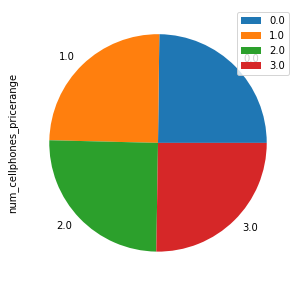

In [12]:
res.plot.pie(y='num_cellphones_pricerange', figsize=(5, 5))

**In the following we evaluate the mean amount of ram, regarding price_range**
As it is evident from the bar chart, we can conclude that there's a corrolation between these parameters and as the ram increases,price range increases too. Mean of ram amount in different price range categories have a difference of 1000 megabytes.

In [13]:
df2 = df.pivot_table(values='ram', index='price_range', aggfunc='mean')
df2

,ram
price_range,
0.0,777.659955
1.0,1695.847875
2.0,2586.704194
3.0,3448.881319


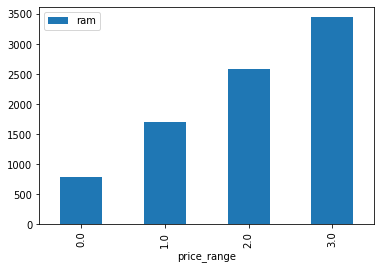

In [14]:
import matplotlib.pyplot as plt
df2.plot( y='ram', kind = 'bar')
plt.show()

**In the following we evaluate having bluetooth , regarding price_range**. Obviosuly there is an uprising trend because  more cellphones with bluetooth can be found among expensive cellphones.

In [15]:
df2 = df.pivot_table(values='blue', index='price_range', aggfunc='sum')
df2


,blue
price_range,
0.0,221.0
1.0,222.0
2.0,223.0
3.0,242.0


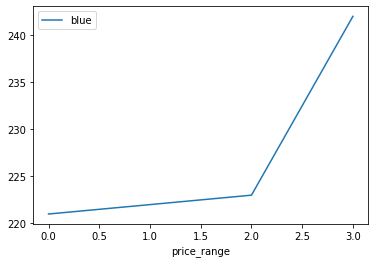

In [16]:
df2.plot( y='blue', kind = 'line')
plt.show()

**comparing number of cores among dataset**.
Cellphones with 4 cores have the highest frequency.

In [17]:
res = df.groupby('n_cores').agg(num_cellphones = ('n_cores', 'count'))

print(res)

         num_cellphones
n_cores                
1.0                 218
2.0                 221
3.0                 217
4.0                 240
5.0                 225
6.0                 213
7.0                 233
8.0                 235


In [ ]:
# df_res = pd.DataFrame(res)
# df_res

In [ ]:
# zip_iterator = zip([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0], df_res['num_cellphones'])
# dict1=dict(zip_iterator)
# dict1

In [ ]:
# df_res["n_cores"] = dict1.keys()
# df_res["num_cellphones"]=dict1.values

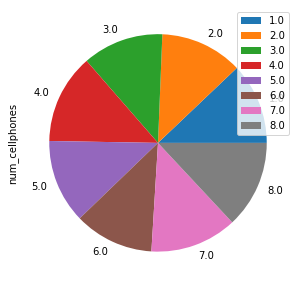

In [18]:
res.plot.pie(y='num_cellphones', figsize=(5, 5))

**stronger battery powers are prevalent among higher price ranges**

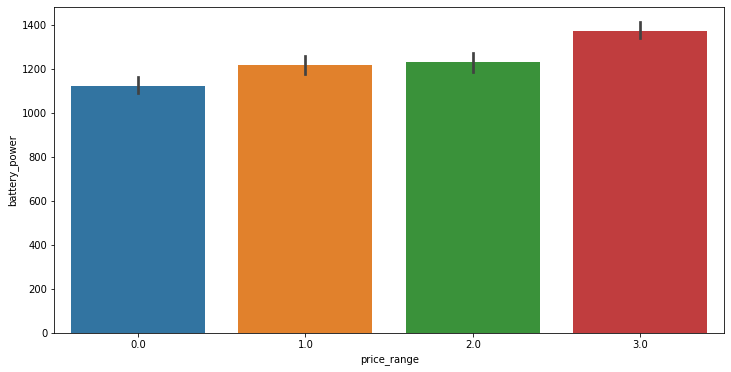

In [19]:
import seaborn as sns
plt.figure(figsize = (12,6))
sns.barplot(x = 'price_range', y = 'battery_power', data=df)
plt.show()

**there are more cellphones having 3g advantage and the numbers of them are roughly equal among different price ranges.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


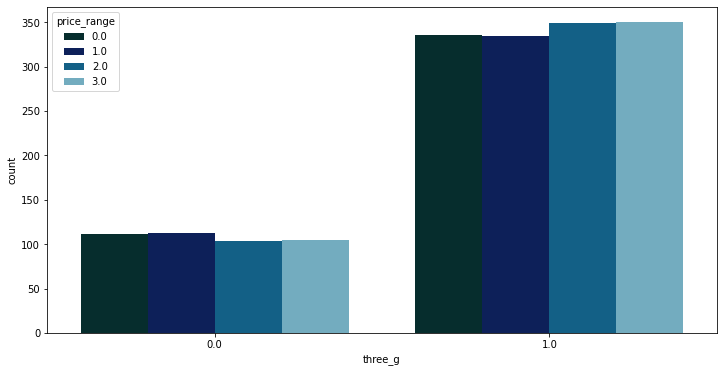

In [20]:
plt.figure(figsize = (12,6))
sns.countplot(df['three_g'] , hue = df['price_range'] , palette = 'ocean')
plt.show()

-----------------------------------------**Task 3**-----------------------------------------

In [21]:
from scipy import stats
pop_mean=df["ram"].mean()

pop_mode=df["ram"].mode()

pop_median=df["ram"].median()
pop_std=df["ram"].std()
print(pop_median)

print(pop_mean)

print(pop_mode)
print(pop_std)

2174.0
2134.6703662597115
0    1464.0
1    2227.0
2    2610.0
dtype: float64
1086.6666563843203


**log transform**

In [22]:
df['logram'] = np.log(df['ram'])
pop_mean=df["logram"].mean()

pop_mode=df["logram"].mode()

pop_median=df["logram"].median()
pop_std=df["logram"].std()
print(pop_median)

print(pop_mean)

print(pop_mode)
print(pop_std)

7.684323961889607
7.483044015342459
0    7.288928
1    7.708411
2    7.867106
dtype: float64
0.6746951390236208


**QUESTION 1**: null hypothesis: Mean of the ram among cellphones in higher price ranges is equal to population mean.
H1 : Mean of ram among cellphones in higher price ranges is not equal to population mean






In [23]:
price_range_three=df.loc[df['price_range'] == 3.0]
price_range_three=price_range_three[['logram']]
price_range_three_mean_of_ram=price_range_three.mean()
price_range_three_mean_of_ram

logram    8.138543
dtype: float64

In [24]:
import scipy as sp
from scipy import stats
_ , p=sp.stats.ttest_1samp(df["logram"],  8.138543, axis=0, nan_policy='propagate')
print(f"p-value is {p}")

p-value is 2.361136521083648e-262


**T test shows p-value<0.05 and it rejects our null hypothesis so H1 is true.**

**QUESTION 2:chi-2**

null hypothesis:there is no relation between dual-sim and four g .'\
H1             :there is a relation between dual-sim and four g. 

In [25]:
df['four_g'].std() 


0.4995420657986503

In [26]:
df['dual_sim_normalized']=df['dual_sim']-df['dual_sim'].mean()/df['dual_sim'].std()
df['four_g_normalized']=df['four_g']-df['four_g'].mean()/df['four_g'].std()

In [27]:
data_crosstab = pd.crosstab(df['dual_sim_normalized'], df['four_g_normalized'], margins = False)                          
#contingency table                                                           
print(data_crosstab)

four_g_normalized    -1.049796  -0.049796
dual_sim_normalized                      
-1.00752                   421        473
-0.00752                   436        472


In [28]:
from scipy.stats import chi2_contingency

# Get chi-square value , p-value, degrees of freedom, expected frequencies using the function chi2_contingency
stat, p, dof, expected = chi2_contingency(data_crosstab)
# select significance value
alpha = 0.05
# Determine whether to reject or keep your null hypothesis
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Variables are associated (reject H0)')
else:
    print('Variables are not associated(fail to reject H0)')

significance=0.050, p=0.729
Variables are not associated(fail to reject H0)


in conclusion since pvalue is more than 0.5, hypothesis 0(null hypothesis) is correct and there is no relation between two features.

**QUESTION 3:pearson test**
Is there any relation between internal memory and battery power   

In [29]:
pop_mean=df["int_memory"].mean()

pop_mode=df["int_memory"].mode()

pop_median=df["int_memory"].median()
pop_std=df["int_memory"].std()
print(pop_median)

print(pop_mean)

print(pop_mode)
print(pop_std)

32.0
32.165926748057714
0    27.0
dtype: float64
18.089655611582504


In [30]:
df['logmemory'] = np.log(df['int_memory'])
df['logbattery'] = np.log(df['battery_power'])

In [31]:
from scipy.stats.stats import pearsonr
x=df["logmemory"].to_numpy()

y=df["logbattery"].to_numpy()

sp.stats.pearsonr(x, y)

(0.00041605522582533806, 0.9859186449511311)

Pearson’s correlation coefficient is 0.0.00041605522582533806, so no correlation is observed.

**QUESTION 4**: null hypothesis: Mean of the talk time among cellphones in higher price ranges is equal to population mean.
H1 : Mean of talk time among cellphones in higher price ranges is not equal to population mean

In [32]:
pop_mean=df["talk_time"].mean()

pop_mode=df["talk_time"].mode()

pop_median=df["talk_time"].median()
pop_std=df["talk_time"].std()
print(pop_median)

print(pop_mean)

print(pop_mode)
print(pop_std)

11.0
11.003884572697004
0    7.0
dtype: float64
5.448408924130782


In [33]:
df['logtalk_time'] = np.log(df['talk_time'])


In [34]:
pop_mean=df["logtalk_time"].mean()

pop_mode=df["logtalk_time"].mode()

pop_median=df["logtalk_time"].median()
pop_std=df["logtalk_time"].std()
print(pop_median)

print(pop_mean)

print(pop_mode)
print(pop_std)

2.3978952727983707
2.2329900414628296
0    1.94591
dtype: float64
0.631219477449356


In [35]:
price_range_three=df.loc[df['price_range'] == 3.0]
price_range_three=price_range_three[['logtalk_time']]
price_range_three_mean_of_talk=price_range_three.mean()
price_range_three_mean_of_talk

logtalk_time    2.240587
dtype: float64

In [36]:
_, p=sp.stats.ttest_1samp(df["logtalk_time"],  2.240587, axis=0, nan_policy='propagate')
print(f"p-value is {p}")

p-value is 0.6094829957490455


T test shows p-value>0.05 and it acceptes our null hypothesis so H0 is true.

**QUESTION 5**: null hypothesis: Mean of the number of cores among cellphones in higher price ranges is equal to population mean. H1 : Mean of number of cores among cellphones in higher price ranges is not equal to population mean

In [37]:
pop_mean=df["n_cores"].mean()

pop_mode=df["n_cores"].mode()

pop_median=df["n_cores"].median()
pop_std=df["n_cores"].std()
print(pop_median)

print(pop_mean)

print(pop_mode)
print(pop_std)

5.0
4.5421753607103215
0    4.0
dtype: float64
2.292746773924802


In [38]:
df["logn_cores"] = np.log(df["n_cores"])

In [39]:
pop_mean=df["logn_cores"].mean()

pop_mode=df["logn_cores"].mode()

pop_median=df["logn_cores"].median()
pop_std=df["logn_cores"].std()
print(pop_median)

print(pop_mean)

print(pop_mode)
print(pop_std)

1.6094379124341003
1.3374745640851238
0    1.386294
dtype: float64
0.6542457407576747


In [40]:
price_range_three=df.loc[df['price_range'] == 3.0]
price_range_three=price_range_three[['logn_cores']]
price_range_three_mean_of_cores=price_range_three.mean()
price_range_three_mean_of_cores

logn_cores    1.320555
dtype: float64

In [41]:
_, p=sp.stats.ttest_1samp(df["logn_cores"],   1.320555, axis=0, nan_policy='propagate')
print(f"p-value is {p}")

p-value is 0.27243589344978975


T test shows p-value>0.05 and it acceptes our null hypothesis so H0 is true.

-----------------------------------------**Task 4 and Task 5**-----------------------------------------

In [42]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,logram,dual_sim_normalized,four_g_normalized,logmemory,logbattery,logtalk_time,logn_cores
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0,7.843456,-1.00752,-1.049796,1.945910,6.735780,2.944439,0.693147
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0,7.875119,-0.00752,-0.049796,3.970292,6.928538,1.945910,1.098612
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0,7.864420,-0.00752,-0.049796,3.713572,6.333280,2.197225,1.609438
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0,7.926242,-1.00752,-1.049796,2.302585,6.421622,2.397895,1.791759
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1.0,7.252054,-1.00752,-0.049796,3.784190,7.507141,2.708050,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,1.0,0.5,1.0,0.0,1.0,2.0,0.8,106.0,6.0,14.0,1222.0,1890.0,668.0,13.0,4.0,19.0,1.0,1.0,0.0,0.0,6.504288,-0.00752,-0.049796,0.693147,6.677083,2.944439,1.791759
1996,1965.0,1.0,2.6,1.0,0.0,0.0,39.0,0.2,187.0,4.0,3.0,915.0,1965.0,2032.0,11.0,10.0,16.0,1.0,1.0,1.0,2.0,7.616776,-0.00752,-1.049796,3.663562,7.583248,2.772589,1.386294
1997,1911.0,0.0,0.9,1.0,1.0,1.0,36.0,0.7,108.0,8.0,3.0,868.0,1632.0,3057.0,9.0,1.0,5.0,1.0,1.0,0.0,3.0,8.025189,-0.00752,-0.049796,3.583519,7.555382,1.609438,2.079442
1998,1512.0,0.0,0.9,0.0,4.0,1.0,46.0,0.1,145.0,5.0,5.0,336.0,670.0,869.0,18.0,10.0,19.0,1.0,1.0,1.0,0.0,6.767343,-1.00752,-0.049796,3.828641,7.321189,2.944439,1.609438


In [43]:
df.drop(["logram",	"dual_sim_normalized",	"dual_sim_normalized",	"logmemory",	"logbattery",	"logtalk_time",	"logn_cores"], axis=1,  inplace=True)

In [44]:
df.drop(["four_g_normalized"], axis=1,  inplace=True)

In [45]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
x.shape,y.shape

((1802, 20), (1802,))

In [46]:
from sklearn.model_selection import train_test_split as split
x_train,x_val,y_train,y_val = split(x,y, test_size = 0.1, stratify=y)
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((1621, 20), (181, 20), (1621,), (181,))

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
#kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0, algorithm='elkan').fit(x_train)
y_predicted = kmeans.predict(x_val)
y_predicted

array([1, 1, 1, 2, 1, 3, 1, 3, 2, 3, 1, 1, 1, 2, 3, 0, 0, 3, 0, 2, 3, 1,
       2, 0, 1, 3, 3, 0, 3, 0, 3, 1, 2, 0, 0, 1, 2, 0, 3, 3, 1, 3, 1, 0,
       1, 1, 0, 2, 3, 0, 3, 1, 0, 1, 0, 2, 2, 3, 2, 0, 1, 1, 1, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 3, 1, 0, 3, 0, 3, 0, 3, 1, 3, 1, 3, 3, 0, 1, 0,
       2, 1, 0, 0, 3, 3, 1, 2, 3, 3, 2, 3, 1, 3, 1, 0, 0, 0, 1, 0, 1, 1,
       2, 3, 1, 3, 2, 1, 3, 1, 1, 2, 0, 2, 2, 0, 1, 3, 3, 3, 1, 2, 2, 1,
       1, 1, 3, 3, 0, 0, 2, 0, 2, 3, 0, 1, 1, 0, 1, 1, 0, 2, 0, 3, 1, 0,
       1, 0, 2, 2, 1, 2, 0, 1, 1, 1, 3, 1, 0, 3, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 3, 0, 1, 3], dtype=int32)

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_predicted)

array([[ 0, 42,  1,  2],
       [ 0, 16, 15, 14],
       [11,  0, 11, 23],
       [39,  0,  3,  4]])

In [50]:
#kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0, algorithm='full').fit(x_train)
y_predicted = kmeans.predict(x_val)
y_predicted

array([1, 1, 1, 2, 1, 3, 1, 3, 2, 3, 1, 1, 1, 2, 3, 0, 0, 3, 0, 2, 3, 1,
       2, 0, 1, 3, 3, 0, 3, 0, 3, 1, 2, 0, 0, 1, 2, 0, 3, 3, 1, 3, 1, 0,
       1, 1, 0, 2, 3, 0, 3, 1, 0, 1, 0, 2, 2, 3, 2, 0, 1, 1, 1, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 3, 1, 0, 3, 0, 3, 0, 3, 1, 3, 1, 3, 3, 0, 1, 0,
       2, 1, 0, 0, 3, 3, 1, 2, 3, 3, 2, 3, 1, 3, 1, 0, 0, 0, 1, 0, 1, 1,
       2, 3, 1, 3, 2, 1, 3, 1, 1, 2, 0, 2, 2, 0, 1, 3, 3, 3, 1, 2, 2, 1,
       1, 1, 3, 3, 0, 0, 2, 0, 2, 3, 0, 1, 1, 0, 1, 1, 0, 2, 0, 3, 1, 0,
       1, 0, 2, 2, 1, 2, 0, 1, 1, 1, 3, 1, 0, 3, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 3, 0, 1, 3], dtype=int32)

In [51]:
confusion_matrix(y_val, y_predicted)

array([[ 0, 42,  1,  2],
       [ 0, 16, 15, 14],
       [11,  0, 11, 23],
       [39,  0,  3,  4]])

In [52]:
#kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0, algorithm='auto').fit(x_train)
y_predicted = kmeans.predict(x_val)
y_predicted

array([1, 1, 1, 2, 1, 3, 1, 3, 2, 3, 1, 1, 1, 2, 3, 0, 0, 3, 0, 2, 3, 1,
       2, 0, 1, 3, 3, 0, 3, 0, 3, 1, 2, 0, 0, 1, 2, 0, 3, 3, 1, 3, 1, 0,
       1, 1, 0, 2, 3, 0, 3, 1, 0, 1, 0, 2, 2, 3, 2, 0, 1, 1, 1, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 3, 1, 0, 3, 0, 3, 0, 3, 1, 3, 1, 3, 3, 0, 1, 0,
       2, 1, 0, 0, 3, 3, 1, 2, 3, 3, 2, 3, 1, 3, 1, 0, 0, 0, 1, 0, 1, 1,
       2, 3, 1, 3, 2, 1, 3, 1, 1, 2, 0, 2, 2, 0, 1, 3, 3, 3, 1, 2, 2, 1,
       1, 1, 3, 3, 0, 0, 2, 0, 2, 3, 0, 1, 1, 0, 1, 1, 0, 2, 0, 3, 1, 0,
       1, 0, 2, 2, 1, 2, 0, 1, 1, 1, 3, 1, 0, 3, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 3, 0, 1, 3], dtype=int32)

In [53]:
confusion_matrix(y_val, y_predicted)

array([[ 0, 42,  1,  2],
       [ 0, 16, 15, 14],
       [11,  0, 11, 23],
       [39,  0,  3,  4]])

In [54]:
#decisionTree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', splitter='best', min_samples_split=3)
cross_val_score(clf, x_train, y_train, cv=10)
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_val)
y_predicted

array([0., 0., 0., 1., 0., 2., 0., 2., 3., 1., 1., 0., 1., 1., 2., 2., 2.,
       1., 3., 1., 2., 1., 1., 2., 0., 2., 2., 3., 2., 3., 1., 0., 2., 3.,
       2., 0., 1., 2., 1., 2., 0., 2., 0., 3., 0., 0., 3., 2., 1., 3., 2.,
       0., 3., 0., 3., 1., 2., 0., 1., 3., 0., 0., 1., 2., 2., 2., 3., 3.,
       3., 3., 3., 2., 2., 0., 3., 1., 3., 2., 3., 1., 0., 2., 0., 2., 2.,
       3., 1., 3., 1., 0., 3., 2., 2., 2., 0., 1., 1., 2., 3., 2., 0., 1.,
       0., 3., 3., 3., 1., 3., 0., 1., 1., 2., 0., 2., 1., 1., 1., 0., 1.,
       3., 3., 0., 2., 3., 0., 2., 0., 2., 0., 3., 3., 1., 0., 0., 0., 2.,
       3., 3., 1., 3., 1., 2., 2., 0., 0., 3., 0., 0., 3., 2., 3., 1., 0.,
       3., 1., 2., 2., 1., 0., 1., 2., 0., 2., 0., 1., 0., 3., 2., 3., 1.,
       0., 1., 0., 3., 0., 3., 3., 3., 3., 0., 2.])

In [55]:
confusion_matrix(y_val, y_predicted)

array([[43,  2,  0,  0],
       [ 5, 36,  4,  0],
       [ 0,  2, 36,  7],
       [ 0,  0,  7, 39]])

In [56]:
#decisionTree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, criterion='gini', splitter='random')
cross_val_score(clf, x_train, y_train, cv=10)
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_val)
y_predicted

array([0., 0., 0., 1., 0., 2., 0., 2., 3., 1., 1., 0., 1., 2., 2., 2., 2.,
       1., 2., 1., 3., 1., 1., 2., 1., 2., 1., 3., 3., 3., 1., 0., 2., 3.,
       3., 1., 1., 3., 1., 2., 1., 2., 0., 2., 0., 0., 3., 2., 1., 3., 2.,
       0., 3., 0., 3., 1., 2., 1., 1., 3., 0., 0., 0., 2., 1., 2., 3., 3.,
       3., 3., 2., 2., 2., 0., 3., 1., 3., 2., 3., 1., 0., 1., 1., 2., 3.,
       3., 0., 3., 2., 0., 3., 3., 2., 3., 0., 1., 1., 2., 3., 2., 0., 1.,
       0., 3., 2., 3., 1., 3., 0., 0., 2., 2., 0., 3., 1., 1., 1., 0., 1.,
       2., 3., 0., 2., 3., 0., 2., 1., 2., 0., 3., 2., 1., 0., 0., 0., 2.,
       3., 3., 1., 3., 1., 2., 3., 0., 0., 3., 1., 0., 3., 2., 3., 1., 0.,
       3., 2., 3., 2., 1., 0., 1., 3., 0., 1., 1., 1., 0., 2., 2., 3., 1.,
       0., 1., 0., 3., 0., 3., 3., 2., 3., 0., 2.])

In [57]:
confusion_matrix(y_val, y_predicted)

array([[37,  8,  0,  0],
       [ 6, 32,  7,  0],
       [ 0,  5, 31,  9],
       [ 0,  0,  6, 40]])

In [58]:
#decisionTree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', splitter='best')
cross_val_score(clf, x_train, y_train, cv=10)
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_val)
y_predicted

array([0., 0., 0., 1., 0., 2., 0., 2., 3., 1., 1., 0., 1., 1., 2., 2., 2.,
       1., 3., 1., 2., 1., 1., 2., 0., 2., 2., 3., 2., 3., 1., 0., 2., 3.,
       2., 0., 1., 2., 1., 2., 0., 2., 0., 3., 0., 0., 3., 2., 1., 3., 2.,
       0., 3., 0., 3., 1., 2., 0., 1., 3., 0., 0., 1., 2., 2., 2., 3., 3.,
       3., 3., 3., 2., 2., 0., 3., 1., 3., 2., 3., 1., 0., 2., 0., 2., 2.,
       3., 1., 3., 1., 0., 3., 2., 3., 2., 0., 2., 1., 2., 3., 2., 0., 1.,
       0., 3., 3., 3., 1., 3., 0., 1., 1., 2., 0., 2., 1., 1., 1., 0., 1.,
       3., 3., 0., 2., 3., 0., 2., 0., 2., 0., 3., 3., 1., 0., 0., 0., 2.,
       3., 3., 1., 3., 1., 2., 2., 0., 0., 3., 0., 0., 3., 2., 3., 1., 0.,
       3., 1., 3., 1., 1., 0., 1., 2., 0., 2., 0., 1., 0., 3., 2., 3., 1.,
       0., 1., 0., 3., 0., 3., 3., 3., 3., 0., 2.])

In [59]:
confusion_matrix(y_val, y_predicted)

array([[43,  2,  0,  0],
       [ 5, 36,  4,  0],
       [ 0,  2, 34,  9],
       [ 0,  0,  7, 39]])

In [60]:
#random forst
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf2 = RandomForestClassifier(criterion='entropy')
clf2.fit(x_train, y_train)
y_predicted = clf2.predict(x_val)
y_predicted

array([0., 0., 0., 1., 0., 1., 0., 2., 2., 1., 1., 0., 1., 1., 2., 2., 2.,
       1., 2., 1., 3., 1., 1., 2., 0., 2., 2., 3., 2., 3., 1., 0., 2., 3.,
       2., 0., 1., 3., 1., 2., 1., 2., 0., 2., 0., 0., 3., 2., 1., 3., 2.,
       0., 3., 0., 3., 1., 2., 1., 1., 3., 0., 0., 0., 2., 2., 2., 3., 3.,
       3., 3., 2., 2., 2., 0., 3., 1., 3., 2., 3., 1., 0., 2., 0., 2., 3.,
       3., 0., 3., 1., 0., 3., 2., 2., 2., 0., 1., 1., 2., 3., 2., 0., 1.,
       0., 3., 3., 3., 0., 3., 0., 0., 1., 2., 0., 2., 1., 1., 1., 0., 1.,
       2., 3., 0., 2., 3., 0., 2., 0., 2., 0., 3., 2., 1., 0., 0., 1., 2.,
       3., 3., 1., 3., 1., 2., 3., 0., 0., 3., 0., 0., 2., 2., 3., 1., 0.,
       3., 1., 2., 1., 1., 0., 1., 3., 0., 1., 0., 2., 0., 3., 2., 3., 1.,
       0., 1., 0., 3., 0., 3., 3., 3., 3., 0., 2.])

In [61]:
confusion_matrix(y_val, y_predicted)

array([[44,  1,  0,  0],
       [ 5, 38,  2,  0],
       [ 0,  2, 40,  3],
       [ 0,  0,  5, 41]])

In [62]:
#random forst
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf2 = RandomForestClassifier(criterion='entropy', n_estimators=10)
clf2.fit(x_train, y_train)
y_predicted = clf2.predict(x_val)
y_predicted

array([0., 0., 0., 1., 0., 1., 0., 2., 3., 1., 1., 0., 1., 1., 2., 2., 3.,
       2., 2., 1., 3., 1., 1., 2., 0., 2., 2., 3., 2., 3., 2., 0., 1., 3.,
       2., 0., 1., 3., 1., 2., 0., 2., 0., 3., 0., 0., 3., 2., 1., 3., 3.,
       0., 2., 0., 3., 1., 2., 1., 1., 3., 0., 0., 0., 2., 3., 1., 3., 3.,
       3., 3., 2., 2., 2., 0., 3., 1., 2., 2., 3., 1., 0., 2., 0., 2., 2.,
       3., 0., 3., 1., 0., 3., 3., 2., 2., 0., 1., 1., 1., 3., 1., 0., 1.,
       0., 3., 3., 3., 0., 3., 0., 0., 1., 1., 0., 3., 1., 1., 1., 0., 1.,
       2., 3., 0., 2., 2., 0., 1., 0., 2., 0., 3., 2., 1., 0., 1., 1., 2.,
       3., 3., 1., 3., 1., 2., 3., 0., 0., 3., 0., 0., 2., 2., 3., 2., 0.,
       3., 1., 2., 1., 1., 0., 1., 2., 0., 1., 0., 1., 0., 1., 1., 3., 1.,
       0., 0., 0., 3., 0., 3., 3., 3., 3., 0., 2.])

In [63]:
confusion_matrix(y_val, y_predicted)

array([[44,  1,  0,  0],
       [ 6, 36,  3,  0],
       [ 0,  8, 32,  5],
       [ 0,  1,  5, 40]])

In [64]:
#random forst
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf2 = RandomForestClassifier(criterion='gini', n_estimators=102)
clf2.fit(x_train, y_train)
y_predicted = clf2.predict(x_val)
y_predicted

array([0., 0., 0., 1., 0., 1., 0., 2., 2., 1., 1., 0., 1., 1., 2., 3., 2.,
       1., 2., 2., 2., 1., 1., 2., 0., 2., 2., 3., 2., 3., 1., 0., 2., 3.,
       2., 0., 1., 3., 1., 2., 1., 2., 0., 2., 0., 0., 3., 2., 1., 3., 2.,
       0., 3., 0., 3., 1., 2., 1., 1., 3., 0., 0., 0., 2., 2., 2., 3., 3.,
       3., 3., 2., 2., 2., 0., 3., 1., 3., 2., 3., 1., 0., 2., 0., 2., 3.,
       3., 0., 3., 1., 0., 3., 3., 2., 2., 0., 1., 1., 2., 3., 1., 0., 1.,
       0., 3., 3., 3., 0., 3., 0., 0., 2., 2., 0., 2., 1., 1., 1., 0., 1.,
       2., 3., 0., 2., 3., 0., 2., 1., 2., 0., 3., 3., 1., 0., 0., 1., 2.,
       3., 3., 1., 3., 1., 2., 3., 0., 0., 3., 0., 0., 2., 2., 3., 2., 0.,
       3., 1., 2., 1., 1., 0., 1., 3., 0., 1., 1., 1., 0., 3., 2., 3., 1.,
       0., 1., 0., 3., 0., 3., 3., 3., 3., 0., 2.])

In [65]:
confusion_matrix(y_val, y_predicted)

array([[42,  3,  0,  0],
       [ 5, 37,  3,  0],
       [ 0,  2, 41,  2],
       [ 0,  0,  2, 44]])

-----------------------------------------**Task 6**-----------------------------------------

**the data among 4 price range classes are quite balanced**

In [66]:
res = df.groupby('price_range').agg(num_cellphones_pricerange = ('price_range', 'count'))

print(res)

             num_cellphones_pricerange
price_range                           
0.0                                447
1.0                                447
2.0                                453
3.0                                455


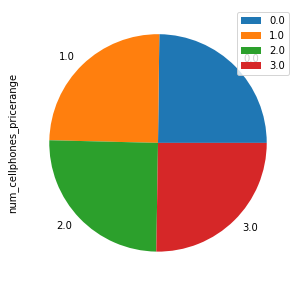

In [67]:
res.plot.pie(y='num_cellphones_pricerange', figsize=(5, 5))

-----------------------------------------**Task 7**-----------------------------------------

In [107]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
x.shape,y.shape

((1802, 20), (1802,))

In [108]:
from sklearn.model_selection import train_test_split as split
x_train,x_val,y_train,y_val = split(x,y, test_size = 0.1, stratify=y)
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((1621, 20), (181, 20), (1621,), (181,))

In [110]:
#scaling
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
x_train = trans.fit_transform(x_train)
x_train = pd.DataFrame(x_train)


x_val = trans.fit_transform(x_val)
x_val = pd.DataFrame(x_val)

In [111]:
#kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0, algorithm='elkan').fit(x_train)
y_predicted = kmeans.predict(x_val)
y_predicted

array([1, 0, 2, 3, 3, 0, 0, 1, 3, 0, 2, 1, 0, 3, 0, 0, 2, 2, 3, 1, 2, 2,
       3, 2, 2, 0, 3, 2, 0, 3, 1, 0, 1, 0, 1, 0, 2, 2, 2, 1, 0, 2, 1, 3,
       2, 1, 1, 1, 3, 0, 1, 3, 3, 2, 1, 1, 0, 0, 0, 3, 2, 2, 0, 1, 2, 2,
       2, 0, 3, 3, 0, 0, 3, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 2, 1, 2, 3,
       3, 0, 2, 2, 2, 1, 3, 1, 1, 2, 2, 1, 1, 3, 3, 1, 0, 0, 0, 2, 0, 2,
       0, 0, 3, 0, 0, 2, 0, 3, 0, 2, 3, 3, 2, 0, 0, 1, 0, 2, 1, 0, 3, 0,
       3, 1, 3, 2, 3, 3, 0, 0, 1, 1, 1, 1, 3, 3, 2, 2, 1, 1, 3, 1, 0, 1,
       0, 1, 1, 1, 3, 3, 2, 3, 0, 3, 2, 1, 0, 0, 2, 2, 1, 1, 1, 3, 0, 2,
       0, 1, 1, 0, 1], dtype=int32)

In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_predicted)

array([[16,  3, 14, 12],
       [13, 12,  8, 12],
       [17, 10, 11,  7],
       [ 9, 20,  9,  8]])

In [113]:
#kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0, algorithm='full').fit(x_train)
y_predicted = kmeans.predict(x_val)
y_predicted

array([1, 0, 2, 3, 3, 0, 0, 1, 3, 0, 2, 1, 0, 3, 0, 0, 2, 2, 3, 1, 2, 2,
       3, 2, 2, 0, 3, 2, 0, 3, 1, 0, 1, 0, 1, 0, 2, 2, 2, 1, 0, 2, 1, 3,
       2, 1, 1, 1, 3, 0, 1, 3, 3, 2, 1, 1, 0, 0, 0, 3, 2, 2, 0, 1, 2, 2,
       2, 0, 3, 3, 0, 0, 3, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 2, 1, 2, 3,
       3, 0, 2, 2, 2, 1, 3, 1, 1, 2, 2, 1, 1, 3, 3, 1, 0, 0, 0, 2, 0, 2,
       0, 0, 3, 0, 0, 2, 0, 3, 0, 2, 3, 3, 2, 0, 0, 1, 0, 2, 1, 0, 3, 0,
       3, 1, 3, 2, 3, 3, 0, 0, 1, 1, 1, 1, 3, 3, 2, 2, 1, 1, 3, 1, 0, 1,
       0, 1, 1, 1, 3, 3, 2, 3, 0, 3, 2, 1, 0, 0, 2, 2, 1, 1, 1, 3, 0, 2,
       0, 1, 1, 0, 1], dtype=int32)

In [114]:
confusion_matrix(y_val, y_predicted)

array([[16,  3, 14, 12],
       [13, 12,  8, 12],
       [17, 10, 11,  7],
       [ 9, 20,  9,  8]])

In [115]:
#kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0, algorithm='auto').fit(x_train)
y_predicted = kmeans.predict(x_val)
y_predicted

array([1, 0, 2, 3, 3, 0, 0, 1, 3, 0, 2, 1, 0, 3, 0, 0, 2, 2, 3, 1, 2, 2,
       3, 2, 2, 0, 3, 2, 0, 3, 1, 0, 1, 0, 1, 0, 2, 2, 2, 1, 0, 2, 1, 3,
       2, 1, 1, 1, 3, 0, 1, 3, 3, 2, 1, 1, 0, 0, 0, 3, 2, 2, 0, 1, 2, 2,
       2, 0, 3, 3, 0, 0, 3, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 2, 1, 2, 3,
       3, 0, 2, 2, 2, 1, 3, 1, 1, 2, 2, 1, 1, 3, 3, 1, 0, 0, 0, 2, 0, 2,
       0, 0, 3, 0, 0, 2, 0, 3, 0, 2, 3, 3, 2, 0, 0, 1, 0, 2, 1, 0, 3, 0,
       3, 1, 3, 2, 3, 3, 0, 0, 1, 1, 1, 1, 3, 3, 2, 2, 1, 1, 3, 1, 0, 1,
       0, 1, 1, 1, 3, 3, 2, 3, 0, 3, 2, 1, 0, 0, 2, 2, 1, 1, 1, 3, 0, 2,
       0, 1, 1, 0, 1], dtype=int32)

In [116]:
confusion_matrix(y_val, y_predicted)

array([[16,  3, 14, 12],
       [13, 12,  8, 12],
       [17, 10, 11,  7],
       [ 9, 20,  9,  8]])

**minmax scaler**

In [117]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
x.shape,y.shape

((1802, 20), (1802,))

In [118]:
from sklearn.model_selection import train_test_split as split
x_train,x_val,y_train,y_val = split(x,y, test_size = 0.1, stratify=y)
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((1621, 20), (181, 20), (1621,), (181,))

In [119]:
#scaling
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
x_train = trans.fit_transform(x_train)
x_train = pd.DataFrame(x_train)


x_val = trans.fit_transform(x_val)
x_val = pd.DataFrame(x_val)

In [120]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
x_train = trans.fit_transform(x_train)

trans = MinMaxScaler()
x_val = trans.fit_transform(x_val)

In [121]:
#decisionTree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', splitter='best', min_samples_split=3)
cross_val_score(clf, x_train, y_train, cv=10)
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_val)
y_predicted

array([2., 3., 3., 1., 3., 3., 2., 3., 0., 3., 3., 3., 3., 0., 3., 1., 0.,
       3., 0., 3., 1., 3., 2., 3., 0., 1., 2., 1., 1., 2., 1., 3., 1., 0.,
       0., 0., 2., 1., 1., 3., 3., 0., 1., 1., 0., 0., 1., 0., 1., 2., 0.,
       3., 1., 2., 3., 1., 2., 3., 2., 1., 2., 1., 0., 2., 2., 3., 1., 3.,
       1., 1., 0., 3., 2., 2., 3., 2., 2., 3., 0., 3., 2., 2., 0., 3., 2.,
       3., 3., 1., 3., 2., 2., 0., 2., 2., 0., 0., 3., 3., 0., 3., 1., 1.,
       1., 2., 2., 3., 1., 0., 1., 3., 1., 2., 3., 0., 1., 2., 1., 2., 0.,
       0., 3., 3., 3., 0., 1., 1., 2., 0., 1., 1., 3., 1., 3., 3., 2., 0.,
       2., 2., 1., 0., 2., 0., 2., 3., 2., 3., 0., 3., 1., 1., 2., 0., 0.,
       3., 2., 2., 0., 0., 1., 2., 3., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 2., 3., 0., 1., 3., 2., 0., 2., 3., 0.])

In [122]:
confusion_matrix(y_val, y_predicted)

array([[42,  3,  0,  0],
       [ 3, 34,  8,  0],
       [ 0,  6, 30,  9],
       [ 0,  0,  5, 41]])

In [123]:
#decisionTree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, criterion='gini', splitter='random')
cross_val_score(clf, x_train, y_train, cv=10)
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_val)
y_predicted

array([2., 3., 3., 0., 3., 3., 2., 2., 0., 2., 3., 3., 2., 0., 3., 1., 0.,
       3., 0., 3., 0., 3., 1., 3., 0., 1., 2., 1., 1., 2., 0., 3., 1., 0.,
       0., 0., 2., 1., 2., 3., 2., 0., 2., 1., 0., 0., 1., 0., 2., 2., 1.,
       3., 2., 2., 3., 0., 3., 2., 2., 1., 1., 1., 0., 1., 2., 3., 1., 3.,
       1., 1., 0., 3., 3., 2., 3., 3., 2., 3., 1., 2., 1., 2., 0., 3., 2.,
       3., 3., 1., 2., 1., 2., 0., 2., 1., 0., 0., 3., 3., 0., 3., 1., 1.,
       1., 2., 1., 2., 2., 0., 1., 2., 2., 2., 2., 0., 2., 2., 1., 1., 1.,
       0., 2., 3., 3., 0., 1., 0., 2., 0., 1., 1., 3., 2., 2., 3., 2., 0.,
       1., 3., 1., 0., 2., 0., 3., 3., 2., 3., 0., 3., 1., 1., 2., 0., 0.,
       3., 2., 1., 0., 0., 1., 2., 3., 0., 0., 2., 0., 0., 0., 0., 0., 0.,
       1., 1., 3., 0., 1., 2., 3., 0., 3., 3., 0.])

In [124]:
confusion_matrix(y_val, y_predicted)

array([[43,  2,  0,  0],
       [ 5, 34,  6,  0],
       [ 0,  6, 34,  5],
       [ 0,  0,  7, 39]])

In [125]:
#decisionTree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', splitter='best')
cross_val_score(clf, x_train, y_train, cv=10)
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_val)
y_predicted

array([2., 3., 3., 1., 3., 3., 2., 3., 0., 3., 3., 3., 3., 0., 3., 1., 0.,
       3., 0., 3., 1., 3., 2., 3., 0., 1., 2., 1., 1., 2., 1., 3., 1., 0.,
       0., 0., 2., 1., 1., 3., 3., 0., 1., 1., 0., 0., 1., 0., 1., 2., 0.,
       3., 1., 2., 3., 1., 2., 3., 2., 1., 2., 1., 0., 2., 2., 3., 1., 3.,
       1., 1., 0., 3., 2., 2., 3., 2., 2., 3., 0., 3., 2., 2., 0., 3., 2.,
       3., 3., 1., 3., 2., 2., 0., 2., 2., 0., 0., 3., 3., 0., 3., 1., 1.,
       1., 2., 2., 3., 1., 0., 1., 3., 1., 2., 3., 0., 1., 2., 1., 2., 0.,
       0., 3., 3., 3., 0., 1., 1., 2., 0., 1., 1., 3., 1., 3., 3., 2., 0.,
       2., 2., 1., 0., 2., 0., 2., 3., 2., 3., 0., 3., 1., 1., 2., 0., 0.,
       3., 2., 2., 0., 0., 1., 2., 3., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 2., 3., 0., 1., 3., 2., 0., 2., 3., 0.])

In [126]:
confusion_matrix(y_val, y_predicted)

array([[42,  3,  0,  0],
       [ 3, 34,  8,  0],
       [ 0,  6, 30,  9],
       [ 0,  0,  5, 41]])

**RobustScaler**

In [150]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
x.shape,y.shape

((1802, 20), (1802,))

In [151]:
from sklearn.model_selection import train_test_split as split
x_train,x_val,y_train,y_val = split(x,y, test_size = 0.1, stratify=y)
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((1621, 20), (181, 20), (1621,), (181,))

In [152]:
#scaling
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
x_train = trans.fit_transform(x_train)
x_train = pd.DataFrame(x_train)


x_val = trans.fit_transform(x_val)
x_val = pd.DataFrame(x_val)

In [153]:
from sklearn.preprocessing import RobustScaler
trans = RobustScaler()
x_train = trans.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_val = trans.fit_transform(x_val)
x_val = pd.DataFrame(x_val)

In [154]:
#random forst
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf2 = RandomForestClassifier(criterion='entropy')
clf2.fit(x_train, y_train)
y_predicted = clf2.predict(x_val)
y_predicted

array([0., 2., 3., 0., 3., 2., 2., 0., 2., 2., 2., 2., 0., 0., 0., 0., 1.,
       2., 3., 3., 3., 2., 3., 3., 0., 1., 1., 1., 1., 2., 3., 0., 1., 0.,
       1., 3., 1., 0., 0., 1., 2., 1., 3., 2., 1., 2., 2., 0., 0., 3., 2.,
       0., 0., 0., 3., 1., 2., 2., 2., 3., 1., 0., 0., 2., 1., 0., 3., 1.,
       2., 1., 1., 2., 2., 3., 2., 0., 0., 2., 3., 1., 0., 3., 0., 3., 0.,
       3., 1., 0., 1., 0., 3., 0., 2., 3., 0., 1., 3., 3., 0., 3., 1., 0.,
       3., 2., 3., 1., 3., 2., 1., 2., 1., 1., 2., 2., 3., 1., 2., 0., 3.,
       3., 2., 2., 1., 1., 0., 1., 0., 2., 0., 0., 3., 0., 2., 2., 0., 0.,
       2., 3., 1., 0., 0., 0., 1., 0., 3., 3., 1., 3., 3., 3., 2., 0., 2.,
       1., 3., 2., 3., 2., 2., 2., 2., 3., 3., 2., 3., 3., 2., 2., 2., 3.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 3.])

In [155]:
confusion_matrix(y_val, y_predicted)

array([[45,  0,  0,  0],
       [ 4, 36,  5,  0],
       [ 0,  3, 40,  2],
       [ 0,  0,  3, 43]])

In [156]:
clf2.score(x_val, y_val)

0.9060773480662984

In [137]:
#random forst
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf2 = RandomForestClassifier(criterion='entropy', n_estimators=10)
clf2.fit(x_train, y_train)
y_predicted = clf2.predict(x_val)
y_predicted

array([2., 3., 2., 0., 1., 3., 1., 3., 3., 2., 2., 1., 3., 0., 3., 1., 3.,
       1., 2., 0., 3., 0., 3., 0., 1., 1., 0., 3., 2., 3., 1., 3., 3., 0.,
       1., 3., 3., 0., 2., 3., 0., 3., 2., 1., 2., 0., 1., 1., 2., 0., 2.,
       0., 3., 2., 0., 0., 2., 1., 3., 0., 3., 1., 1., 0., 3., 0., 2., 2.,
       1., 2., 1., 3., 3., 0., 1., 2., 2., 0., 1., 0., 3., 0., 0., 0., 2.,
       2., 3., 3., 1., 3., 1., 2., 1., 3., 1., 3., 0., 0., 0., 2., 1., 3.,
       3., 0., 3., 1., 3., 3., 3., 2., 0., 0., 3., 1., 3., 2., 0., 0., 3.,
       3., 0., 3., 2., 2., 1., 3., 3., 1., 3., 1., 2., 0., 0., 2., 0., 3.,
       0., 2., 2., 0., 3., 0., 2., 0., 1., 2., 0., 3., 3., 1., 1., 3., 1.,
       1., 1., 1., 1., 2., 0., 0., 2., 3., 2., 3., 1., 3., 2., 2., 2., 1.,
       2., 0., 2., 2., 0., 0., 2., 0., 3., 2., 1.])

In [138]:
confusion_matrix(y_val, y_predicted)

array([[41,  4,  0,  0],
       [ 5, 30,  9,  1],
       [ 0,  6, 29, 10],
       [ 0,  0,  5, 41]])

In [139]:
#random forst
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf2 = RandomForestClassifier(criterion='gini', n_estimators=102)
clf2.fit(x_train, y_train)
y_predicted = clf2.predict(x_val)
y_predicted

array([2., 3., 2., 0., 1., 3., 0., 3., 3., 2., 3., 1., 3., 0., 3., 1., 3.,
       1., 2., 0., 3., 0., 3., 0., 1., 1., 0., 3., 2., 3., 1., 3., 3., 0.,
       1., 3., 3., 0., 2., 3., 0., 3., 3., 1., 3., 0., 1., 1., 3., 0., 3.,
       0., 3., 2., 0., 0., 2., 0., 3., 1., 3., 2., 1., 1., 3., 0., 2., 3.,
       1., 2., 1., 3., 3., 1., 1., 2., 2., 1., 1., 0., 3., 0., 1., 0., 2.,
       2., 3., 3., 1., 3., 1., 2., 1., 3., 1., 3., 0., 0., 0., 2., 1., 3.,
       3., 0., 2., 1., 3., 3., 3., 3., 0., 0., 3., 1., 3., 2., 0., 0., 3.,
       3., 0., 2., 2., 2., 1., 2., 1., 1., 3., 2., 2., 0., 1., 2., 0., 3.,
       0., 1., 2., 0., 2., 0., 2., 1., 2., 3., 0., 3., 3., 1., 1., 3., 1.,
       1., 1., 2., 1., 2., 1., 0., 2., 3., 2., 3., 1., 3., 2., 2., 3., 1.,
       2., 0., 2., 2., 0., 0., 1., 0., 3., 2., 1.])

In [140]:
confusion_matrix(y_val, y_predicted)

array([[39,  6,  0,  0],
       [ 1, 33, 11,  0],
       [ 0,  6, 28, 11],
       [ 0,  0,  1, 45]])

-----------------------------------------**Task 8**-----------------------------------------

In [141]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
x.shape,y.shape

((1802, 20), (1802,))

In [142]:
from sklearn.model_selection import train_test_split as split
x_train,x_val,y_train,y_val = split(x,y, test_size = 0.2, stratify=y)
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((1441, 20), (361, 20), (1441,), (361,))

In [143]:
#scaling
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
x_train = trans.fit_transform(x_train)
x_train = pd.DataFrame(x_train)


x_val = trans.fit_transform(x_val)
x_val = pd.DataFrame(x_val)

In [144]:
from sklearn.preprocessing import RobustScaler
trans = RobustScaler()
x_train = trans.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_val = trans.fit_transform(x_val)
x_val = pd.DataFrame(x_val)

In [145]:
#random forst
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf2 = RandomForestClassifier(criterion='entropy')
clf2.fit(x_train, y_train)
y_predicted = clf2.predict(x_val)
y_predicted

array([3., 2., 3., 1., 3., 2., 0., 1., 1., 0., 1., 3., 1., 2., 2., 0., 0.,
       3., 0., 1., 3., 2., 0., 3., 3., 3., 2., 2., 3., 3., 3., 2., 0., 3.,
       2., 0., 3., 3., 2., 1., 0., 0., 0., 3., 0., 0., 3., 3., 2., 2., 2.,
       0., 3., 0., 0., 2., 1., 2., 3., 0., 0., 0., 0., 1., 2., 3., 1., 1.,
       0., 0., 3., 2., 0., 1., 2., 3., 2., 0., 2., 3., 3., 1., 3., 0., 3.,
       2., 2., 2., 1., 1., 0., 0., 3., 3., 0., 0., 1., 0., 3., 3., 0., 1.,
       2., 0., 2., 3., 2., 3., 3., 2., 0., 3., 3., 0., 2., 1., 3., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 1., 3., 0., 0., 0., 2., 1., 1., 1., 1.,
       2., 2., 0., 3., 3., 2., 1., 3., 0., 2., 1., 2., 3., 0., 3., 1., 0.,
       0., 0., 0., 1., 2., 2., 2., 3., 2., 0., 0., 3., 3., 1., 3., 0., 0.,
       2., 0., 3., 3., 0., 1., 2., 1., 3., 2., 2., 3., 2., 1., 2., 0., 2.,
       3., 2., 1., 1., 3., 3., 3., 2., 0., 2., 0., 3., 2., 3., 2., 0., 0.,
       2., 2., 0., 2., 3., 0., 3., 3., 1., 1., 2., 2., 0., 3., 2., 1., 2.,
       0., 3., 1., 1., 3.

In [146]:
confusion_matrix(y_val, y_predicted)

array([[85,  5,  0,  0],
       [ 8, 70, 11,  0],
       [ 0,  7, 76,  8],
       [ 0,  0,  1, 90]])

In [149]:
clf2.score(x_val, y_val)

0.889196675900277

-----------------------------------------**Task 9**-----------------------------------------

In [183]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
x.shape,y.shape

((1802, 20), (1802,))

In [ ]:
# from sklearn.model_selection import train_test_split as split
# x_train,x_val,y_train,y_val = split(x,y, test_size = 0.2, stratify=y)
# x_train.shape,x_val.shape,y_train.shape,y_val.shape

((1441, 20), (361, 20), (1441,), (361,))

In [184]:
#scaling
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
x = trans.fit_transform(x)
x = pd.DataFrame(x)


In [185]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf
finalDf = pd.concat([principalDf, df[['price_range']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,price_range
0,1.077010,2.310927,1.0
1,-1.912622,-0.031298,2.0
2,-1.105114,0.230059,2.0
3,-1.166963,0.685520,2.0
4,1.353527,-1.202640,1.0


In [186]:
x = finalDf.iloc[:,0:-1]
y = finalDf.iloc[:,-1]
x.shape,y.shape

((1976, 2), (1976,))

In [187]:
x.dropna(how="any", inplace=True)

In [188]:
y.dropna(how="any", inplace=True)

In [189]:
np.any(np.isnan(x))

False

In [190]:
from sklearn.model_selection import train_test_split as split
x_train,x_val,y_train,y_val = split(x,y, test_size = 0.2, stratify=y)
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((1441, 2), (361, 2), (1441,), (361,))

In [191]:
from sklearn.preprocessing import RobustScaler
trans = RobustScaler()
x_train = trans.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_val = trans.fit_transform(x_val)
x_val = pd.DataFrame(x_val)

In [192]:
#random forst
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf2 = RandomForestClassifier(criterion='entropy')
clf2.fit(x_train, y_train)
y_predicted = clf2.predict(x_val)
y_predicted

array([1., 2., 2., 0., 1., 0., 3., 2., 0., 0., 1., 2., 1., 1., 3., 0., 3.,
       1., 1., 1., 2., 1., 1., 3., 2., 1., 3., 2., 0., 0., 2., 0., 0., 1.,
       1., 2., 3., 0., 3., 2., 3., 1., 2., 3., 2., 2., 0., 3., 2., 3., 1.,
       2., 0., 1., 3., 1., 2., 1., 1., 3., 2., 2., 1., 1., 1., 1., 1., 3.,
       2., 2., 1., 1., 2., 3., 1., 0., 0., 3., 0., 1., 2., 1., 3., 2., 2.,
       0., 1., 0., 3., 2., 2., 3., 2., 3., 1., 0., 2., 3., 0., 3., 2., 2.,
       2., 0., 1., 0., 1., 2., 0., 0., 1., 1., 3., 2., 2., 0., 3., 3., 3.,
       0., 0., 0., 0., 1., 2., 1., 0., 2., 3., 3., 1., 2., 2., 0., 1., 3.,
       1., 0., 2., 1., 2., 1., 1., 2., 1., 1., 3., 3., 1., 2., 0., 2., 3.,
       1., 3., 2., 3., 2., 0., 0., 2., 1., 0., 3., 0., 3., 1., 1., 3., 2.,
       1., 3., 3., 0., 3., 2., 3., 0., 0., 3., 0., 2., 2., 1., 0., 1., 2.,
       2., 2., 3., 0., 2., 3., 3., 3., 3., 3., 1., 0., 2., 2., 0., 3., 0.,
       3., 3., 2., 0., 0., 1., 0., 1., 0., 1., 1., 1., 2., 2., 2., 1., 3.,
       3., 2., 2., 2., 1.

In [196]:
confusion_matrix(y_val, y_predicted)

array([[21, 27, 24, 18],
       [18, 30, 17, 24],
       [25, 22, 26, 18],
       [22, 17, 26, 26]])

In [194]:
clf2.score(x_val, y_val)

0.2853185595567867

-----------------------------------------**Task 10**-----------------------------------------

In [319]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
x.shape,y.shape

((1802, 20), (1802,))

In [320]:
y[   (y==1) | (y==2) | (y==3) ]=5

In [321]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
x.shape,y.shape

((1802, 20), (1802,))

In [322]:
from sklearn.model_selection import train_test_split as split
x_train,x_val,y_train,y_val = split(x,y, test_size = 0.1, stratify=y)
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((1621, 20), (181, 20), (1621,), (181,))

In [323]:
#scaling
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
x_train = trans.fit_transform(x_train)
x_train = pd.DataFrame(x_train)


x_val = trans.fit_transform(x_val)
x_val = pd.DataFrame(x_val)

In [324]:
from sklearn.preprocessing import RobustScaler
trans = RobustScaler()
x_train = trans.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_val = trans.fit_transform(x_val)
x_val = pd.DataFrame(x_val)

In [325]:
#random forst
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf2 = RandomForestClassifier(criterion='entropy')
clf2.fit(x_train, y_train)
y_predicted = clf2.predict(x_val)
y_predicted

array([5., 0., 5., 5., 5., 5., 5., 0., 0., 5., 5., 0., 0., 0., 5., 5., 5.,
       0., 5., 0., 5., 0., 5., 5., 5., 5., 5., 5., 0., 5., 5., 5., 5., 5.,
       5., 0., 5., 5., 0., 5., 5., 0., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 0., 5., 5., 5., 5., 0., 5., 5., 5., 5., 0., 0., 5.,
       5., 5., 5., 5., 0., 5., 5., 5., 5., 5., 5., 0., 5., 5., 5., 5., 5.,
       5., 0., 5., 5., 5., 5., 0., 5., 5., 0., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 0., 0., 5., 0., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 0., 0., 0., 0., 5., 5., 0., 5., 0., 5., 0., 5., 5.,
       5., 5., 0., 5., 5., 0., 5., 0., 0., 0., 0., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 0., 5., 5., 5., 5.,
       5., 0., 5., 5., 5., 5., 5., 0., 5., 5., 5.])

In [326]:
confusion_matrix(y_val, y_predicted)

array([[ 39,   6],
       [  2, 134]])

In [327]:
from sklearn.model_selection import train_test_split as split
x_train,x_val,y_train,y_val = split(x,y, test_size = 0.1, stratify=y)
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((1621, 20), (181, 20), (1621,), (181,))

In [328]:
import imblearn as imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE 

X_train_sm, y_train_sm = upsample_SMOTE(x_train, y_train, ratio=1.0)
print(X_train_sm, y_train_sm )

2438 2438
      battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0        531.000000  1.000000     0.500000  1.000000  0.000000  1.000000   
1       1587.000000  1.000000     0.500000  0.000000  0.000000  0.000000   
2       1615.000000  1.000000     2.800000  0.000000  3.000000  0.000000   
3       1762.000000  0.000000     0.700000  0.000000  7.000000  0.000000   
4       1960.000000  1.000000     2.300000  1.000000  1.000000  1.000000   
...             ...       ...          ...       ...       ...       ...   
2433    1488.668719  0.000000     2.933620  0.000000  4.073755  1.000000   
2434     673.996028  1.000000     2.665719  0.171406  0.000000  0.171406   
2435     716.550827  0.000000     1.146260  0.000000  0.430840  0.000000   
2436     801.169395  0.964666     2.868200  0.964666  4.141335  0.035334   
2437     889.974025  0.298701     1.459740  1.000000  3.896104  0.298701   

      int_memory     m_dep   mobile_wt   n_cores         pc   px_height  \
0 

In [329]:
x_train  = pd.DataFrame(X_train_sm)
y_train  = pd.DataFrame(y_train_sm)

In [330]:
#scaling
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
x_train = trans.fit_transform(x_train)
x_train = pd.DataFrame(x_train)


x_val = trans.fit_transform(x_val)
x_val = pd.DataFrame(x_val)

In [331]:
from sklearn.preprocessing import RobustScaler
trans = RobustScaler()
x_train = trans.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_val = trans.fit_transform(x_val)
x_val = pd.DataFrame(x_val)

In [332]:
#random forst
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf2 = RandomForestClassifier(criterion='entropy')
clf2.fit(x_train, y_train)
y_predicted = clf2.predict(x_val)
y_predicted

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


array([0., 5., 0., 0., 5., 0., 0., 5., 0., 0., 0., 0., 5., 0., 0., 5., 5.,
       5., 5., 0., 0., 5., 0., 5., 5., 5., 0., 0., 0., 0., 5., 0., 0., 0.,
       0., 5., 0., 0., 0., 0., 5., 5., 5., 5., 0., 0., 5., 0., 5., 0., 5.,
       5., 5., 5., 5., 0., 0., 0., 0., 0., 0., 0., 0., 5., 0., 0., 0., 5.,
       5., 0., 5., 5., 0., 5., 5., 0., 0., 5., 0., 5., 5., 5., 5., 0., 5.,
       0., 0., 0., 0., 0., 0., 0., 5., 5., 5., 0., 0., 5., 5., 0., 0., 0.,
       0., 0., 5., 5., 5., 0., 0., 5., 5., 5., 5., 5., 5., 5., 0., 5., 0.,
       5., 0., 5., 5., 5., 0., 0., 0., 0., 5., 0., 0., 0., 0., 5., 0., 5.,
       5., 5., 5., 5., 0., 0., 0., 5., 0., 0., 0., 0., 0., 5., 0., 5., 0.,
       5., 0., 0., 5., 0., 5., 0., 5., 0., 5., 0., 0., 5., 5., 0., 5., 0.,
       5., 5., 0., 5., 0., 0., 5., 5., 5., 0., 0.])

In [333]:
confusion_matrix(y_val, y_predicted)

array([[45,  0],
       [54, 82]])